## Data Science - Group 15

### Topic: Toronto E-Bike demographic, travel and public opinion data

In [1]:
##### Data Ingestion

import pandas as pd

raw_data_path = "../data/E-Bike_Survey_Responses.csv"
columnNames = names=['TimeStamp','AgeRange','Sex','PhysicalHealth','Education','HouseholdIncome','EmploymentStatus','District','AvgDistanceTravel','AvgCommute','PreferedTransportation','PrivateMotorizedVehicles','SupportingStatements','MultiUseTrails','AwarePathSpeedLimit','WitnessedCollisionConflict','OpinionSpeedLimit','OpinionPathBylaw','BicycleLaneUsage','OpinionLaneBylaw','OpinionSidewalk','OpinionPersonalMobilityDevice'] # names of columns

survey = pd.read_csv(raw_data_path, names=columnNames, skiprows=1)

survey.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 22 columns):
TimeStamp                        2238 non-null object
AgeRange                         2234 non-null object
Sex                              2221 non-null object
PhysicalHealth                   2227 non-null object
Education                        2220 non-null object
HouseholdIncome                  2178 non-null object
EmploymentStatus                 2223 non-null object
District                         2237 non-null object
AvgDistanceTravel                2237 non-null object
AvgCommute                       2237 non-null object
PreferedTransportation           2238 non-null object
PrivateMotorizedVehicles         2238 non-null object
SupportingStatements             2238 non-null object
MultiUseTrails                   2238 non-null object
AwarePathSpeedLimit              2238 non-null object
WitnessedCollisionConflict       2238 non-null object
OpinionSpeedLimit            

In [2]:
survey = survey.dropna()
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2237
Data columns (total 22 columns):
TimeStamp                        2138 non-null object
AgeRange                         2138 non-null object
Sex                              2138 non-null object
PhysicalHealth                   2138 non-null object
Education                        2138 non-null object
HouseholdIncome                  2138 non-null object
EmploymentStatus                 2138 non-null object
District                         2138 non-null object
AvgDistanceTravel                2138 non-null object
AvgCommute                       2138 non-null object
PreferedTransportation           2138 non-null object
PrivateMotorizedVehicles         2138 non-null object
SupportingStatements             2138 non-null object
MultiUseTrails                   2138 non-null object
AwarePathSpeedLimit              2138 non-null object
WitnessedCollisionConflict       2138 non-null object
OpinionSpeedLimit            

In [3]:
#Drop TimeStamp Column, it does not provide any useful information
survey = survey.drop('TimeStamp', axis = 1)

In [4]:
#print(survey['Sex'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['AgeRange'].value_counts()) # Is Clean
#print(survey['PhysicalHealth'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['Education'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies
#print(survey['HouseholdIncome'].value_counts()) #Is Clean
#print(survey['EmploymentStatus'].value_counts()) #Light Cleaning needed - some non-standard/open ended replies 
#print(survey['District'].value_counts()) #Heavy cleaning needed - alot of non-standard/open ended replies
#print(survey['AvgDistanceTravel'].value_counts())#Is Clean
#print(survey['AvgCommute'].value_counts())#Is Clean
#print(survey['PreferedTransportation'].value_counts())#Light Cleaning needed - some non-standard/open ended responces 
#print(survey['PrivateMotorizedVehicles'].value_counts())#Heavy cleaning needed - alot of non-standard/open ended responces
#print(survey['SupportingStatements'].value_counts()) #Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['MultiUseTrails'].value_counts()) #Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['AwarePathSpeedLimit'].value_counts())# Is Clean
#print(survey['WitnessedCollisionConflict'].value_counts())#Moderate Cleaning needed - various combinations of responces, all appear to be bound
#print(survey['OpinionSpeedLimit'].value_counts())#Heavy Cleaning needed - various combinations of responces and openeded responces
#print(survey['OpinionPathBylaw'].value_counts())  #Moderate Cleaning needed - various combinations of responces and openeded responces        
#print(survey['BicycleLaneUsage'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces       
#print(survey['OpinionLaneBylaw'].value_counts()) #Heavy Cleaning needed - various combinations of responces and openeded responces
#print(survey['OpinionSidewalk'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces           
#print(survey['OpinionPersonalMobilityDevice'].value_counts()) #Moderate Cleaning needed - various combinations of responces and openeded responces                     
               

#As I see it our options (or combination of options) to clean non-standard/open ended responces:
# 1) Drop rows
# 2) Group non-standard/open ended responces it's own category
# 3) Try to fit non-standard/open ended responces into existing categories

#my intial thought it #2 for majority features

#For the data that has various combinations, i.e. those that appear as if they were picked from a picker list, we need to identify all the unique options and: 
#1) do some sort of multi-index
#2) create new Categorical columns - Yes and No for each unique option

#my intial thought it #2 for majority of the feature



In [5]:
#Useful Functions
import re

#Function that retruns unique list from a given list
def unique_list(lst):
    unique_list = []
    for x in lst:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

#Function that splits a string 'splitString' by regexes 'splitOn'
def split_by(splitString, splitOn):
    num = [m.start() for m in re.finditer(splitOn, splitString)]
    start = 0
    SubStrs = []
    for i in num:
        SubStrs.append(splitString[start : i])
        start = i+2
    SubStrs.append(splitString[start : ])
    return SubStrs

#Function that appends unique values by regexes 'splitOn' from string'newString' into a current list 'currentList' of values 
def unique_list_append(currentList, newString, splitOn):
    for x in split_by(newString, splitOn):
        if x not in currentList:
            currentList.append(x)
    return currentList

#Function that returns a list of unique values from column 'feature' in Dataframe 'df'
def unique_feature_list(df, feature, splitOn):
    unique_feature_list = []
    for item, row in df.iterrows():
        unique_list_append(unique_feature_list,row[feature], splitOn)
    return unique_feature_list
        
#Function that retruns datafame with all values other then 'keepValues' in 'feature' replaced with 'replaceWith' in Dataframe 'df'
def Replace_All_Other_Values(df, feature,keepValues,replaceWith):
    for item in df[feature]:
        if item in keepValues:
            pass
        else:
            df = df.replace({feature: item},replaceWith)
    return df

#Function creates a new column 'value'; if 'value' exists in Dataframe 'df' column 'oldFeature' in value for row set to 'Yes'
def new_feature_from_value(df, value, oldFeature):
    df[oldFeature+"_"+value] = 0
    for item, row in df.iterrows():
        if value.lower() in row[oldFeature].lower():
            df.loc[[item],[oldFeature+"_"+value]] = 1
    return df
    
    


    

In [15]:
#Clean Sex feature
survey = Replace_All_Other_Values(survey, 'Sex',['Male','Female'], 'Other')
#survey['Sex'].value_counts()

#Clean PhysicalHealth feature
survey = Replace_All_Other_Values(survey, 'PhysicalHealth',['Good','Excellent','Very good','Fairly good','Poor'], 'Other')
#survey['PhysicalHealth'].value_counts()

#Clean Education feature
survey = Replace_All_Other_Values(survey, 'Education',['University degree','Post graduate','College or trade school diploma','High school diploma '], 'Other')
#survey['Education'].value_counts()

#Clean EmploymentStatus feature
survey = Replace_All_Other_Values(survey, 'EmploymentStatus',['Full Time','Self Employed','Retired','Part Time','Student','Unemployed','Home Maker'], 'Other')
#survey['EmploymentStatus'].value_counts()            

#Clean District feature
survey = Replace_All_Other_Values(survey, 'District',['Central Toronto, York or East York','Etobicoke','North York','Scarborough','Mississauga','Brampton'], 'Other')
#survey['District'].value_counts()  

#Clean PreferedTransportation feature
survey = Replace_All_Other_Values(survey, 'PreferedTransportation',['bicycle','Etobicoke','private motor vehicle (car, truck, SUV, van, motorcycle, gas limited speed motorcycle or moped)','transit','walking','scooter type e-bike','pedal assist type e-bike'], 'Other')
#survey['PreferedTransportation'].value_counts()

#Create new categorical features to replace PrivateMotorizedVehicles feature
survey['PrivateMotorizedVehicles_HasCarSUVTruckOrVan'] = 0
survey['PrivateMotorizedVehicles_HasMotorcycle'] = 0
survey['PrivateMotorizedVehicles_HasBicycle'] = 0
survey['PrivateMotorizedVehicles_HasPAEbike'] = 0
survey['PrivateMotorizedVehicles_HasScooterEbike'] = 0
survey['PrivateMotorizedVehicles_HasGasEbike'] = 0
survey['PrivateMotorizedVehicles_HasAutoShare'] = 0

for item, row in survey.iterrows():
        if "car" in row['PrivateMotorizedVehicles'].lower() or "suv" in row['PrivateMotorizedVehicles'].lower() or "truck" in row['PrivateMotorizedVehicles'].lower() or "van" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasCarSUVTruckOrVan']] = 1
        if "motorcycle" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasMotorcycle']] = 1
        if "bicycle" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasBicycle']] = 1
        if "bike" in row['PrivateMotorizedVehicles'].lower() and ("pedal" in row['PrivateMotorizedVehicles'].lower() or "assist" in row['PrivateMotorizedVehicles'].lower()):
            survey.loc[[item],['PrivateMotorizedVehicles_HasPAEbike']] = 1
        if ("bike" in row['PrivateMotorizedVehicles'].lower() and "scooter" in row['PrivateMotorizedVehicles'].lower()): 
            survey.loc[[item],['PrivateMotorizedVehicles_HasScooterEbike']] = 1             
        if ("scooter" in row['PrivateMotorizedVehicles'].lower() and not "bike" in row['PrivateMotorizedVehicles'].lower()) or "moped" in row['PrivateMotorizedVehicles'].lower() or "vespa" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasGasEbike']] = 1  
        if "share" in row['PrivateMotorizedVehicles'].lower() or "zip" in row['PrivateMotorizedVehicles'].lower() or "rental" in row['PrivateMotorizedVehicles'].lower():
            survey.loc[[item],['PrivateMotorizedVehicles_HasAutoShare']] = 1
          
#survey[['PrivateMotorizedVehicles','PrivateMotorizedVehicles_HasCarSUVTruckOrVan','PrivateMotorizedVehicles_HasMotorcycle','PrivateMotorizedVehicles_HasBicycle','PrivateMotorizedVehicles_HasPAEbike','PrivateMotorizedVehicles_HasScooterEbike','PrivateMotorizedVehicles_HasGasEbike','PrivateMotorizedVehicles_HasAutoShare']]


#Create new categorical features to replace MultiUseTrails feature
survey = new_feature_from_value(survey,'cycle','MultiUseTrails')
survey = new_feature_from_value(survey,'walk','MultiUseTrails')
survey = new_feature_from_value(survey,'rarely use','MultiUseTrails')
survey = new_feature_from_value(survey,'pedal assist type e-bike','MultiUseTrails')
survey = new_feature_from_value(survey,'stroller, young child, or pet','MultiUseTrails')
survey = new_feature_from_value(survey,'run','MultiUseTrails')
survey = new_feature_from_value(survey,'motor propelled e-bike','MultiUseTrails')

#survey[['MultiUseTrails','MultiUseTrails_cycle','MultiUseTrails_walk','MultiUseTrails_rarely use','MultiUseTrails_pedal assist type e-bike','MultiUseTrails_stroller child or pet','MultiUseTrails_run','MultiUseTrails_motor propelled e-bike']]


#Create new categorical features to replace OpinionPathBylaw feature
for i in unique_feature_list(survey,'SupportingStatements', ', [A-Z]'):
    survey = new_feature_from_value(survey, i ,'SupportingStatements')

#showMe =['SupportingStatements']
#for i in unique_feature_list(survey,'SupportingStatements', ', [A-Z]'):
#    showMe.append("SupportingStatements_"+i) 
#survey[showMe]


#Create new categorical features to replace OpinionPathBylaw feature
for i in unique_feature_list(survey,'OpinionPathBylaw', ', [^including^but]'):
    survey = new_feature_from_value(survey, i ,'OpinionPathBylaw')

#showMe =['OpinionPathBylaw']
#for i in unique_feature_list(survey,'OpinionPathBylaw', ', [^including^but]'):
#    showMe.append("OpinionPathBylaw_"+i) 
#survey[showMe]


#Create new categorical features to replace OpinionSidewalk feature
survey = new_feature_from_value(survey,'maintain the existing programs for signage','OpinionSidewalk')
survey = new_feature_from_value(survey,'education and enforcement','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase signage','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase education','OpinionSidewalk')
survey = new_feature_from_value(survey,'increase enforcement','OpinionSidewalk')
survey = new_feature_from_value(survey,'education and enforcement','OpinionSidewalk')

#survey[['OpinionSidewalk','OpinionSidewalk_maintain the existing programs for signage','OpinionSidewalk_education and enforcement','OpinionSidewalk_increase signage','OpinionSidewalk_increase education','OpinionSidewalk_increase enforcement','OpinionSidewalk_education and enforcement']]


#Create new categorical features to replace OpinionPersonalMobilityDevice feature
survey = new_feature_from_value(survey,'Update the definition of a personal mobility device, so that they must travel at speeds close to walking speed','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Institute a speed limit for sidewalks','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Do nothing','OpinionPersonalMobilityDevice')
survey = new_feature_from_value(survey,'Don\'t Know / Rather Not Answer','OpinionPersonalMobilityDevice')

#survey[['OpinionPersonalMobilityDevice','OpinionPersonalMobilityDevice_Update the definition of a personal mobility device, so that they must travel at speeds close to walking speed','OpinionPersonalMobilityDevice_Institute a speed limit for sidewalks','OpinionPersonalMobilityDevice_Do nothing','OpinionPersonalMobilityDevice_Don\'t Know / Rather Not Answer']]



#Create new categorical features to replace OpinionLaneBylaw feature
survey = new_feature_from_value(survey,'The bylaw should be modified to allow e-bikes to drive in bicycle lanes, using their motors and not pedalling, without any restrictions set in place by the City. (eg. width, weight, speed)','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas, but not in busy downtown bicycle lanes','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'No changes are necessary to the existing bylaw','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'Motorized vehicles should generally not be allowed in bicycle lanes, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow \'pedal assist\' type e-bikes to pedal, but get a battery boost','OpinionLaneBylaw')
survey = new_feature_from_value(survey,'The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling, but there should be some restrictions (eg. width, weight, speed)','OpinionLaneBylaw')


#survey[['OpinionLaneBylaw','OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to drive in bicycle lanes, using their motors and not pedalling, without any restrictions set in place by the City. (eg. width, weight, speed)','OpinionLaneBylaw_The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas, but not in busy downtown bicycle lanes','OpinionLaneBylaw_No changes are necessary to the existing bylaw','OpinionLaneBylaw_Motorized vehicles should generally not be allowed in bicycle lanes, but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone','OpinionLaneBylaw_The bylaw should be modified to allow \'pedal assist\' type e-bikes to pedal, but get a battery boost','OpinionLaneBylaw_The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling, but there should be some restrictions (eg. width, weight, speed)']]


#Create new categorical features to replace BicycleLaneUsage feature
survey = new_feature_from_value(survey,'ride a commuter, or cruiser style bicycle','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a road bicycle, or a fixie','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a mountain, downhill, or BMX bicycle','BicycleLaneUsage')
survey = new_feature_from_value(survey,'I do not use bicycle lanes ','BicycleLaneUsage')
survey = new_feature_from_value(survey,'pedal a pedal assist type e-bike ','BicycleLaneUsage')
survey = new_feature_from_value(survey,'drive a scooter type e-bike propelled by an electric motor ','BicycleLaneUsage')
survey = new_feature_from_value(survey,'ride a folding, or recumbent','BicycleLaneUsage')

#survey[['BicycleLaneUsage','BicycleLaneUsage_ride a commuter, or cruiser style bicycle' , 'BicycleLaneUsage_ride a road bicycle, or a fixie' , 'BicycleLaneUsage_ride a mountain, downhill, or BMX bicycle' , 'BicycleLaneUsage_I do not use bicycle lanes' ,'BicycleLaneUsage_pedal a pedal assist type e-bike' ,'BicycleLaneUsage_drive a scooter type e-bike propelled by an electric motor', 'BicycleLaneUsage_ride a folding, or recumbent']]

#Create new categorical features to replace OpinionSpeedLimit feature
survey = new_feature_from_value(survey,'the trails are fine as they are','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more signage','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more enforcement (ticketing)','OpinionSpeedLimit')
survey = new_feature_from_value(survey,'more educational programs','OpinionSpeedLimit')

#survey[['OpinionSpeedLimit','OpinionSpeedLimit_the trails are fine as they are' , 'OpinionSpeedLimit_more signage' , 'OpinionSpeedLimit_more enforcement (ticketing)', 'OpinionSpeedLimit_more educational programs']]

#Create new categorical features to replace WitnessedCollisionConflict feature
survey = new_feature_from_value(survey,'I am not aware of any conflicts on the trails','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between cyclists and pedestrians','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between an e-biker and a pedestrian','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between e-biker and a cyclist','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict relating to a dog(s)','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'pedestrians and/or runners','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict relating to an in-line skater','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between two cyclists','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between an e-biker and a pedestrian','WitnessedCollisionConflict')
survey = new_feature_from_value(survey,'conflict between two e-bikers','WitnessedCollisionConflict')


#survey[['WitnessedCollisionConflict','WitnessedCollisionConflict_I am not aware of any conflicts on the trails','WitnessedCollisionConflict_conflict between cyclists and pedestrians','WitnessedCollisionConflict_conflict between an e-biker and a pedestrian','WitnessedCollisionConflict_conflict between e-biker and a cyclist','WitnessedCollisionConflict_conflict relating to a dog(s)','WitnessedCollisionConflict_pedestrians and/or runners','WitnessedCollisionConflict_conflict relating to an in-line skater','WitnessedCollisionConflict_conflict between two cyclists','WitnessedCollisionConflict_conflict between an e-biker and a pedestrian','WitnessedCollisionConflict_conflict between two e-bikers']]


      Sex   percent
1    Male  0.705332
0  Female  0.290458
2   Other  0.004210
  PhysicalHealth   percent
5      Very good  0.402245
2           Good  0.298410
0      Excellent  0.184284
1    Fairly good  0.094949
4           Poor  0.016838
3          Other  0.003274
                             District   percent
1  Central Toronto, York or East York  0.733396
2                           Etobicoke  0.100094
4                          North York  0.057998
6                         Scarborough  0.054724
5                               Other  0.038821
3                         Mississauga  0.010758
0                            Brampton  0.004210
                         Education   percent
4                University degree  0.402713
3                    Post graduate  0.264733
0  College or trade school diploma  0.235267
1             High school diploma   0.087465
2                            Other  0.009822
  EmploymentStatus   percent
0        Full Time  0.635173
5    Self Employed 

Text(0.5, 1.0, '%HouseholdIncome')

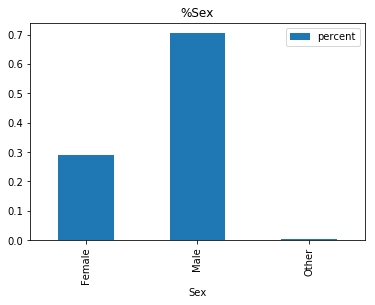

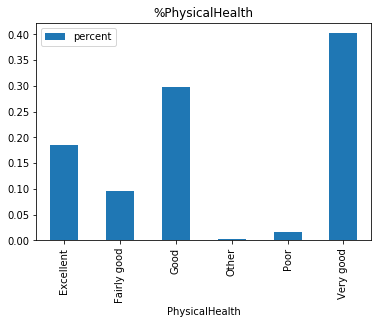

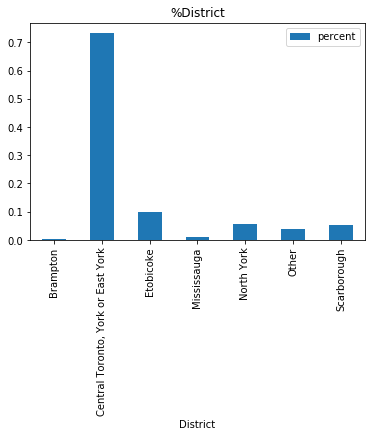

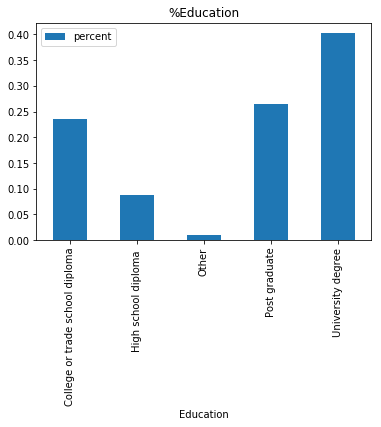

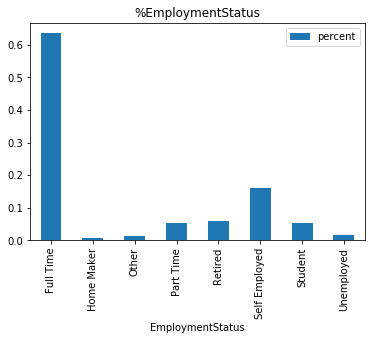

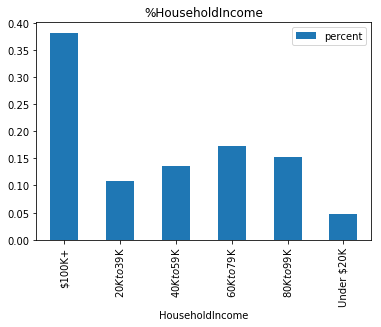

In [96]:
### presents the user characteristics of the e-bike survey respondents. 
import matplotlib.pyplot as plt

#print(survey.head())
#print(survey.info())
sex_grouped = (survey.groupby('Sex')['Sex'].count() / len(survey)).reset_index(name='percent')
print(sex_grouped.sort_values(by='percent',ascending=False))
sex_grouped.plot(kind='bar',x='Sex', y='percent').set_title('%Sex')

health_grouped = (survey.groupby('PhysicalHealth')['PhysicalHealth'].count() / len(survey)).reset_index(name='percent')
print(health_grouped.sort_values(by='percent',ascending=False))
health_grouped.plot(kind='bar',x='PhysicalHealth', y='percent').set_title('%PhysicalHealth')

district_grouped = (survey.groupby('District')['District'].count() / len(survey)).reset_index(name='percent')
print(district_grouped.sort_values(by='percent',ascending=False))
district_grouped.plot(kind='bar',x='District', y='percent').set_title('%District')

education_grouped = (survey.groupby('Education')['Education'].count() / len(survey)).reset_index(name='percent')
print(education_grouped.sort_values(by='percent',ascending=False))
education_grouped.plot(kind='bar',x='Education', y='percent').set_title('%Education')

employment_grouped = (survey.groupby('EmploymentStatus')['EmploymentStatus'].count() / len(survey)).reset_index(name='percent')
print(employment_grouped.sort_values(by='percent',ascending=False))
employment_grouped.plot(kind='bar',x='EmploymentStatus', y='percent').set_title('%EmploymentStatus')

income_grouped = (survey.groupby('HouseholdIncome')['HouseholdIncome'].count() / len(survey)).reset_index(name='percent')
print(income_grouped.sort_values(by='percent',ascending=False))
income_grouped.plot(kind='bar',x='HouseholdIncome', y='percent').set_title('%HouseholdIncome')
